In [1]:
from Hierarchy.PipelineFunctions.MainWorkers import times_when_method_better, MakeDendogram, generator, RunExperiment, ReadLogs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import pickle

/var/folders/7g/1dqbz5hx5994z2r91kw1_k2m0000gn/T/ipykernel_47150/613665142.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
def generation(size, dim):
    norm_dist = sts.norm(0, 1000)
    x = norm_dist.rvs(size).astype(int)

    if dim == 1:
        y = np.zeros(len(x))
    elif dim == 2:
        y = norm_dist.rvs(size).astype(int)

    points = list(zip(x, y))
    points = np.unique(points, axis=0)
    
    return np.array(points)

In [3]:
sample_size = 100
iter_number = 100
dim = 1
file_name = generator(generation, 15000, sample_size, iter_number, dim)

In [23]:
file_name = './new_LOGS/1dim-100-100 2023-04-25 12:40:43/Samples'

In [17]:
# file_samples = open(file_name, 'rb')
# Samples = pickle.load(file_samples)

In [20]:
# for dist_metric in ('euclidean', 'cityblock', 'chebyshev'):
#     new_RunExperiment(dist_metric, file_name[:-8], Samples)

In [24]:
# ПРОВЕРКА НА МОНОТОННОСТЬ
for file_ultra in (f"{file_name[:-8]}/{name}" for name in ('euclidean', 'cityblock', 'chebyshev')):
    TimeLogsList, Ultradists, MaxList, SumList, NameOfMethodList, NormDiff = ReadLogs(file_ultra)
    flag = 0
    for num, ultra in enumerate(Ultradists):
        if sorted(ultra) != ultra:
            display(HTML(f'<h4> The methods in {file_ultra}</h4>'))
            print(f"Пример номер {NameOfMethodList[num]}: {num}")
            print(ultra)
            print()
            flag = 1
    if flag != 1:
        display(HTML(f'<h4> The methods in {file_ultra} is monotonous</h4>'))

In [25]:
ResultsForMaxList = {}
ResultsForSumList = {}
for dist_metric in ('euclidean', 'cityblock', 'chebyshev'):
    dist_metric_dir = f"{file_name[:-8]}/{dist_metric}"
    
    TimeLogsList, Ultradists, MaxList, SumList, NameOfMethodList, NormDiff = ReadLogs(dist_metric_dir)

    MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})
    grouper = MaxMatrix.groupby('NameOfMethod')
    ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)
    ResultsForMaxList[dist_metric] = ResultsForMax

    SumMatrix = pd.DataFrame({'MetricsByMethodsForSum': SumList, 'NameOfMethod': NameOfMethodList})
    grouper = SumMatrix.groupby('NameOfMethod')
    ResultsForSum = pd.concat([pd.Series(v['MetricsByMethodsForSum'].tolist(), name=k) for k, v in grouper], axis=1)
    ResultsForSumList[dist_metric] = ResultsForSum

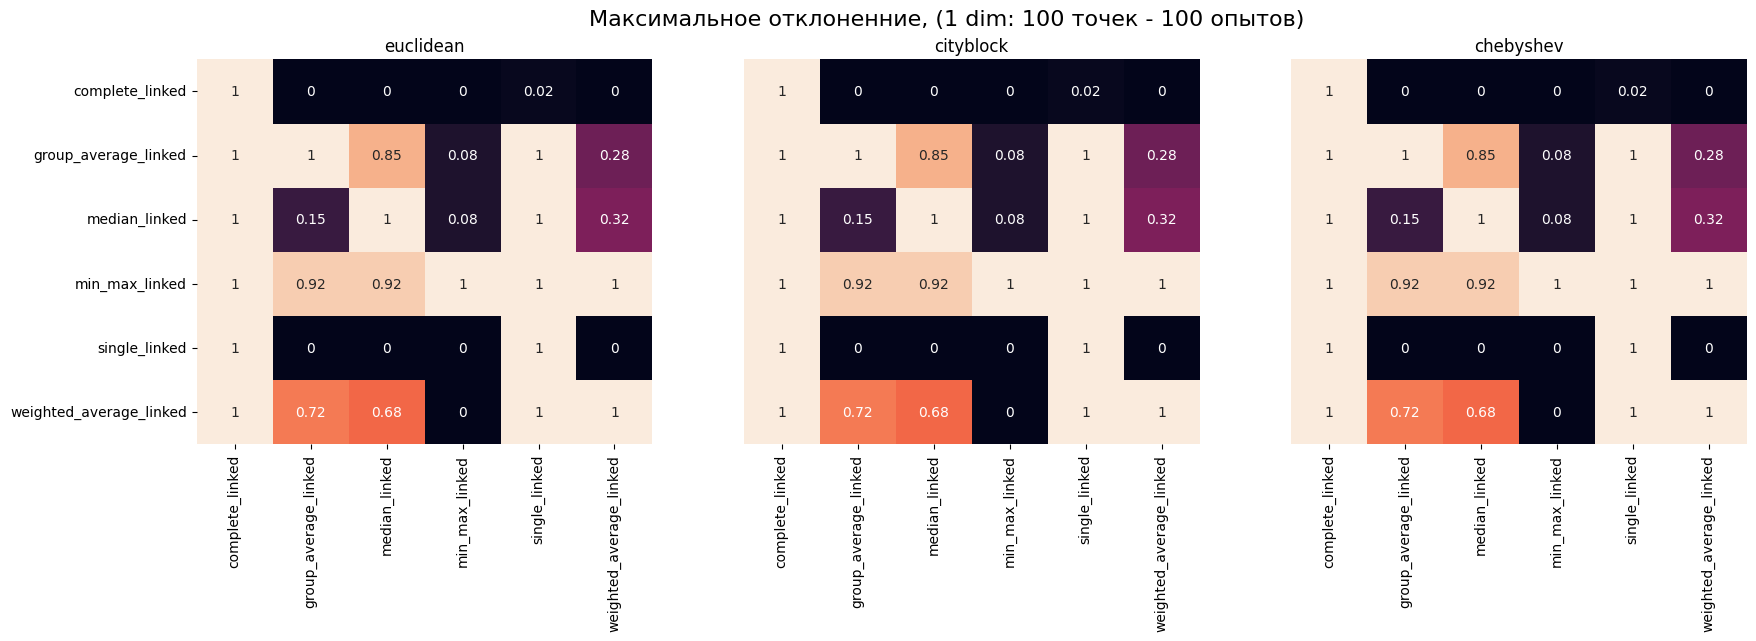

In [26]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

for k, (dist_metric, resmax) in enumerate(ResultsForMaxList.items()):
    if k == 0:
        sns.heatmap(data=times_when_method_better(resmax), ax=axes[k], annot=True, cbar=False)
        axes[k].set_title(dist_metric)
    else:
        sns.heatmap(data=times_when_method_better(resmax), ax=axes[k], annot=True, cbar=False, yticklabels=False)
        axes[k].set_title(dist_metric)

fig.suptitle(f'Максимальное отклоненние, ({dim} dim: {sample_size} точек - {iter_number} опытов)', fontsize=16)
plt.show()

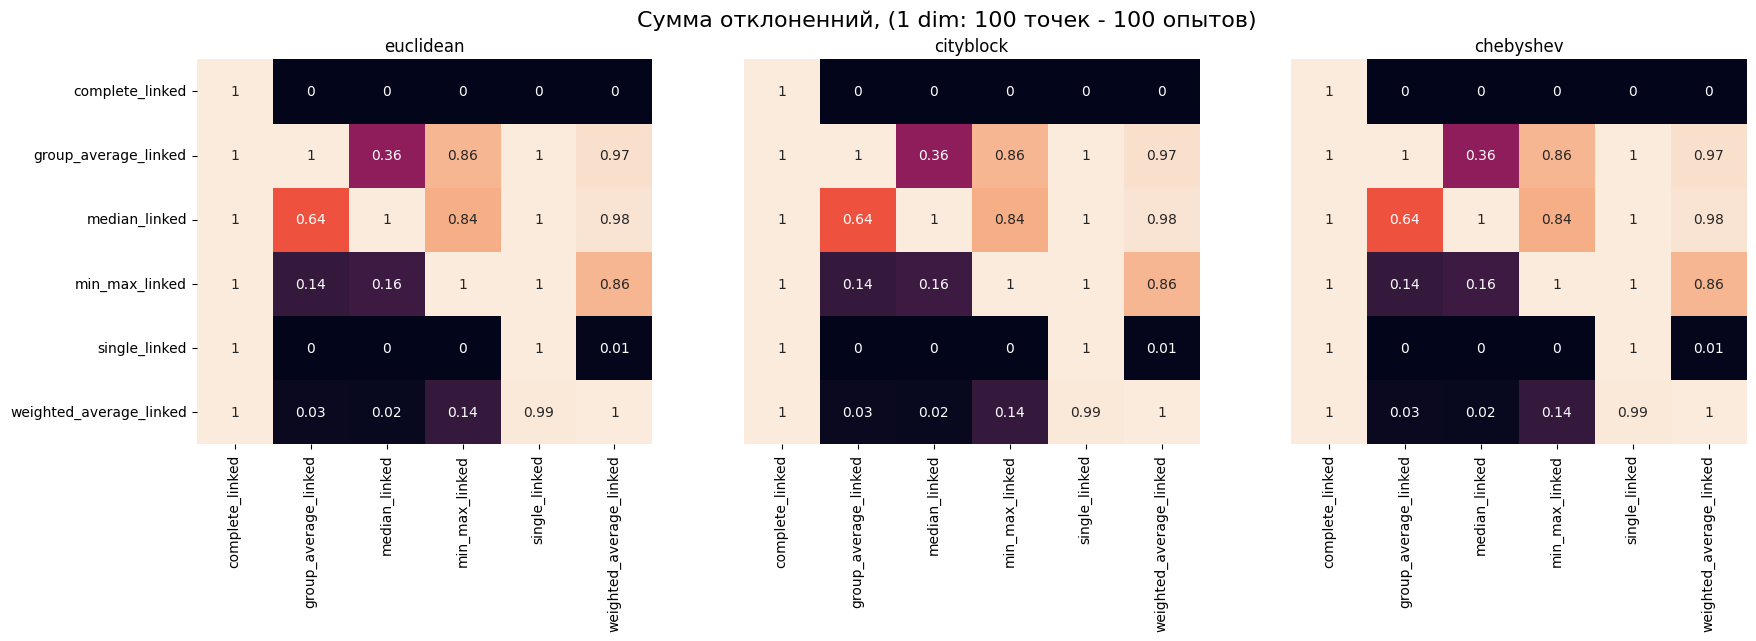

In [27]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))

for k, (dist_metric, ressum) in enumerate(ResultsForSumList.items()):
    if k == 0:
        sns.heatmap(data=times_when_method_better(ressum), ax=axes[k], annot=True, cbar=False)
        axes[k].set_title(dist_metric)
    else:
        sns.heatmap(data=times_when_method_better(ressum), ax=axes[k], annot=True, cbar=False, yticklabels=False)
        axes[k].set_title(dist_metric)

fig.suptitle(f'Сумма отклоненний, ({dim} dim: {sample_size} точек - {iter_number} опытов)', fontsize=16)
plt.show()

In [28]:
print("Метрика Максимального отклонения: случаи когда min_max_linked больше другого метода\n")
for dist_metric, resmax in ResultsForMaxList.items():
    print(dist_metric.upper())
    flag = 0
    for col in resmax.columns:
        exp = list(resmax.query(f'min_max_linked > {col}').index)
        if len(exp) != 0:
            print(f"{col}: {exp}\n")
            flag += 1

    if flag == 0:
        print("Случаев не обнаружено\n")

Метрика Максимального отклонения: случаи когда min_max_linked больше другого метода

EUCLIDEAN
group_average_linked: [11, 41, 43, 45, 56, 59, 67, 80]

median_linked: [26, 43, 45, 50, 55, 56, 67, 80]

CITYBLOCK
group_average_linked: [11, 41, 43, 45, 56, 59, 67, 80]

median_linked: [26, 43, 45, 50, 55, 56, 67, 80]

CHEBYSHEV
group_average_linked: [11, 41, 43, 45, 56, 59, 67, 80]

median_linked: [26, 43, 45, 50, 55, 56, 67, 80]



In [29]:
print("Метрика Суммы отклонений: случаи когда median_linked больше другого метода\n")
for dist_metric, ressum in ResultsForSumList.items():
    print(dist_metric.upper())
    flag = 0
    for col in ressum.columns:
        exp = list(ressum.query(f'median_linked > {col}').index)
        if len(exp) != 0:
            print(f"{col}: {exp}\n")
            flag += 1

    if flag == 0:
        print("Случаев не обнаружено\n")

Метрика Суммы отклонений: случаи когда median_linked больше другого метода

EUCLIDEAN
group_average_linked: [0, 1, 9, 10, 12, 15, 18, 19, 22, 24, 27, 29, 32, 33, 34, 39, 40, 41, 46, 49, 52, 58, 62, 63, 65, 67, 68, 71, 72, 74, 75, 77, 78, 83, 90, 93]

min_max_linked: [1, 2, 7, 10, 12, 13, 40, 49, 62, 69, 72, 78, 81, 86, 91, 99]

weighted_average_linked: [1, 72]

CITYBLOCK
group_average_linked: [0, 1, 9, 10, 12, 15, 18, 19, 22, 24, 27, 29, 32, 33, 34, 39, 40, 41, 46, 49, 52, 58, 62, 63, 65, 67, 68, 71, 72, 74, 75, 77, 78, 83, 90, 93]

min_max_linked: [1, 2, 7, 10, 12, 13, 40, 49, 62, 69, 72, 78, 81, 86, 91, 99]

weighted_average_linked: [1, 72]

CHEBYSHEV
group_average_linked: [0, 1, 9, 10, 12, 15, 18, 19, 22, 24, 27, 29, 32, 33, 34, 39, 40, 41, 46, 49, 52, 58, 62, 63, 65, 67, 68, 71, 72, 74, 75, 77, 78, 83, 90, 93]

min_max_linked: [1, 2, 7, 10, 12, 13, 40, 49, 62, 69, 72, 78, 81, 86, 91, 99]

weighted_average_linked: [1, 72]



## Анализ

In [13]:
from Hierarchy.MedianMethod import MedianHierarchy
from Hierarchy.MinMaxMethod import MinMaxHierarchy
from Hierarchy.StandartMethods import hierarchy
from Hierarchy.ToCulcMethods.Linkages import single_linked, complete_linked, group_average_linked, weighted_average_linked

In [15]:
test_data = Samples[99]
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,-1975.0,0.0
1,-1204.0,0.0
2,-1441.0,0.0
3,-2074.0,0.0
4,375.0,0.0
...,...,...
95,-1281.0,0.0
96,1725.0,0.0
97,415.0,0.0
98,-1520.0,0.0


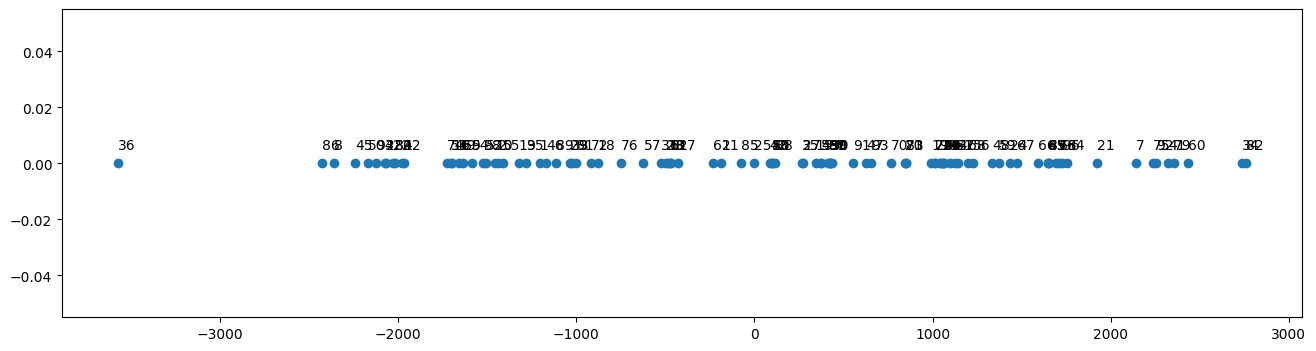

In [16]:
fig = plt.figure()
fig.set_size_inches(16, 4)
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 0.005, str(i))

In [ ]:
# ('euclidean', 'cityblock', 'chebyshev'):
# MinMaxHierarchy(test_data, logs_turn_on=True, metric='euclidean')
MedianHierarchy(test_data, logs_turn_on=True, metric='euclidean')

Distance matrix: 0 step
        0       1       2       3       4       5       6       7       8  \
0     0.0   788.0   331.0  3676.0  1739.0  2584.0  2000.0  3172.0  3974.0   
1   788.0     0.0  1119.0  4464.0  2527.0  3372.0  2788.0  3960.0  4762.0   
2   331.0  1119.0     0.0  3345.0  1408.0  2253.0  1669.0  2841.0  3643.0   
3  3676.0  4464.0  3345.0     0.0  1937.0  1092.0  1676.0   504.0   298.0   
4  1739.0  2527.0  1408.0  1937.0     0.0   845.0   261.0  1433.0  2235.0   
5  2584.0  3372.0  2253.0  1092.0   845.0     0.0   584.0   588.0  1390.0   
6  2000.0  2788.0  1669.0  1676.0   261.0   584.0     0.0  1172.0  1974.0   
7  3172.0  3960.0  2841.0   504.0  1433.0   588.0  1172.0     0.0   802.0   
8  3974.0  4762.0  3643.0   298.0  2235.0  1390.0  1974.0   802.0     0.0   
9   409.0  1197.0    78.0  3267.0  1330.0  2175.0  1591.0  2763.0  3565.0   

        9  
0   409.0  
1  1197.0  
2    78.0  
3  3267.0  
4  1330.0  
5  2175.0  
6  1591.0  
7  2763.0  
8  3565.0  
9     0.

(((((5, 7), (3, 8)), (4, 6)), (((2, 9), 0), 1)),
 array([[   0.,  788.,  331., 3676., 1739., 2584., 2000., 3172., 3974.,
          409.],
        [ 788.,    0., 1119., 4464., 2527., 3372., 2788., 3960., 4762.,
         1197.],
        [ 331., 1119.,    0., 3345., 1408., 2253., 1669., 2841., 3643.,
           78.],
        [3676., 4464., 3345.,    0., 1937., 1092., 1676.,  504.,  298.,
         3267.],
        [1739., 2527., 1408., 1937.,    0.,  845.,  261., 1433., 2235.,
         1330.],
        [2584., 3372., 2253., 1092.,  845.,    0.,  584.,  588., 1390.,
         2175.],
        [2000., 2788., 1669., 1676.,  261.,  584.,    0., 1172., 1974.,
         1591.],
        [3172., 3960., 2841.,  504., 1433.,  588., 1172.,    0.,  802.,
         2763.],
        [3974., 4762., 3643.,  298., 2235., 1390., 1974.,  802.,    0.,
         3565.],
        [ 409., 1197.,   78., 3267., 1330., 2175., 1591., 2763., 3565.,
            0.]]),
 [78.0, 261.0, 298.0, 370.0, 588.0, 947.0, 1119.0, 1554.5, 

In [ ]:
hierarchy(test_data, metric='euclidean', method=single_linked, logs_turn_on=True)

Distance matrix: 0 step
        0       1       2       3       4       5       6       7       8  \
0     0.0   788.0   331.0  3676.0  1739.0  2584.0  2000.0  3172.0  3974.0   
1   788.0     0.0  1119.0  4464.0  2527.0  3372.0  2788.0  3960.0  4762.0   
2   331.0  1119.0     0.0  3345.0  1408.0  2253.0  1669.0  2841.0  3643.0   
3  3676.0  4464.0  3345.0     0.0  1937.0  1092.0  1676.0   504.0   298.0   
4  1739.0  2527.0  1408.0  1937.0     0.0   845.0   261.0  1433.0  2235.0   
5  2584.0  3372.0  2253.0  1092.0   845.0     0.0   584.0   588.0  1390.0   
6  2000.0  2788.0  1669.0  1676.0   261.0   584.0     0.0  1172.0  1974.0   
7  3172.0  3960.0  2841.0   504.0  1433.0   588.0  1172.0     0.0   802.0   
8  3974.0  4762.0  3643.0   298.0  2235.0  1390.0  1974.0   802.0     0.0   
9   409.0  1197.0    78.0  3267.0  1330.0  2175.0  1591.0  2763.0  3565.0   

        9  
0   409.0  
1  1197.0  
2    78.0  
3  3267.0  
4  1330.0  
5  2175.0  
6  1591.0  
7  2763.0  
8  3565.0  
9     0.

(((((2, 9), 0), 1), (((4, 6), 5), ((3, 8), 7))),
 array([[   0.,  788.,  331., 3676., 1739., 2584., 2000., 3172., 3974.,
          409.],
        [ 788.,    0., 1119., 4464., 2527., 3372., 2788., 3960., 4762.,
         1197.],
        [ 331., 1119.,    0., 3345., 1408., 2253., 1669., 2841., 3643.,
           78.],
        [3676., 4464., 3345.,    0., 1937., 1092., 1676.,  504.,  298.,
         3267.],
        [1739., 2527., 1408., 1937.,    0.,  845.,  261., 1433., 2235.,
         1330.],
        [2584., 3372., 2253., 1092.,  845.,    0.,  584.,  588., 1390.,
         2175.],
        [2000., 2788., 1669., 1676.,  261.,  584.,    0., 1172., 1974.,
         1591.],
        [3172., 3960., 2841.,  504., 1433.,  588., 1172.,    0.,  802.,
         2763.],
        [3974., 4762., 3643.,  298., 2235., 1390., 1974.,  802.,    0.,
         3565.],
        [ 409., 1197.,   78., 3267., 1330., 2175., 1591., 2763., 3565.,
            0.]]),
 [78.0, 261.0, 298.0, 331.0, 504.0, 584.0, 588.0, 788.0, 13